In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc  
import pingouin as pg
from sklearn.model_selection import train_test_split


In [2]:
missing_value_formats = ["n.a.","?","NA",":", "na", "--"]
df = pd.read_csv("apro_mk_colm_1_Data.csv", na_values = missing_value_formats)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176220 entries, 0 to 176219
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TIME                176220 non-null  object 
 1   GEO                 176220 non-null  object 
 2   DAIRYPROD           176220 non-null  object 
 3   UNIT                176220 non-null  object 
 4   Value               58156 non-null   float64
 5   Flag and Footnotes  14097 non-null   object 
dtypes: float64(1), object(5)
memory usage: 8.1+ MB


In [4]:
df.head()

,TIME,GEO,DAIRYPROD,UNIT,Value,Flag and Footnotes
0,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Thousand tonnes,NaN,NaN
1,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Fat content (% of product weight),NaN,NaN
2,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Protein content (% of product weight),NaN,NaN
3,2000M01,European Union - 27 countries (from 2020),Raw cream delivered to dairies (in milk equiva...,Thousand tonnes,NaN,NaN
4,2000M01,European Union - 27 countries (from 2020),Raw cream delivered to dairies (in milk equiva...,Fat content (% of product weight),NaN,NaN


# CLEANING

In [5]:
#delete columns and change names of columns

df = df.rename(columns={"GEO": "Country"})
df = df.drop(["Flag and Footnotes"], axis=1)


In [6]:
#identify countries for the study

df.Country.unique() 

array(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)',
       'European Union - 27 countries (2007-2013)',
       'European Union - 25 countries (2004-2006)',
       'European Union - 15 countries (1995-2004)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden',
       'European Economic Area (EEA18-1995, EEA28-2004, EEA30-2007, EEA31-2013, EEA30-2020)',
       'European Free Trade Association', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Albania', 'Serbia', 'Turkey', 'Bosnia and Herzegovina'],
      dtype=object)

In [7]:
#some countries have special characteres

df["DAIRYPROD"]=df["DAIRYPROD"].str.replace("[^\w\s]","")
#df["Value"]=df["Value"].str.replace("[^\w\,]","")



C:\Users\fenix\AppData\Local\Temp/ipykernel_15720/3622012569.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["DAIRYPROD"]=df["DAIRYPROD"].str.replace("[^\w\s]","")


In [8]:
#filter countries and data 

country_list = ['Belgium',"Denmark","Sweden","Ireland","Austria"]
df1 = df[df['Country'].isin(country_list)]
dairy_list = ["Raw cows milk delivered to dairies","Drinking milk","Cream for direct consumption"]
df1= df1[df['DAIRYPROD'].isin(dairy_list)]


C:\Users\fenix\AppData\Local\Temp/ipykernel_15720/4157509316.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1= df1[df['DAIRYPROD'].isin(dairy_list)]


In [9]:
#drop na and duplicates

df1=df1.dropna(subset=["Value"])
df = df1.drop_duplicates()
df.head()

,TIME,Country,DAIRYPROD,UNIT,Value
75,2000M01,Belgium,Raw cows milk delivered to dairies,Thousand tonnes,260.02
76,2000M01,Belgium,Raw cows milk delivered to dairies,Fat content (% of product weight),4.18
77,2000M01,Belgium,Raw cows milk delivered to dairies,Protein content (% of product weight),3.34
81,2000M01,Belgium,Drinking milk,Thousand tonnes,53.93
84,2000M01,Belgium,Cream for direct consumption,Thousand tonnes,5.50


In [10]:
#step before merging and melting, we need to change the layout of the dataset.

milk_delivered_to_dairies=df.query("DAIRYPROD=='Raw cows milk delivered to dairies'")
milk_delivered_to_dairies = milk_delivered_to_dairies.drop(["DAIRYPROD"], axis=1)


drinking_milk=df.query("DAIRYPROD=='Drinking milk'")
drinking_milk = drinking_milk.drop(["DAIRYPROD"], axis=1)

cream =df.query("DAIRYPROD=='Cream for direct consumption'")
cream = cream.drop(["DAIRYPROD"], axis=1)



In [11]:
#second step before merging and melting, in order to change the layout of the dataset.


milk_delivered_to_dairies_tonnes=milk_delivered_to_dairies.query("UNIT=='Thousand tonnes'")
milk_delivered_to_dairies_Fat=milk_delivered_to_dairies.query("UNIT=='Fat content (% of product weight)'")
milk_delivered_to_dairies_Protein=milk_delivered_to_dairies.query("UNIT=='Protein content (% of product weight)'")


milk_delivered_to_dairies_tonnes = milk_delivered_to_dairies_tonnes.rename(columns={"Value": "Thousand_tonnes_to_dairies"})
milk_delivered_to_dairies_Fat=milk_delivered_to_dairies_Fat.rename(columns={"Value": "Fat_content"})
milk_delivered_to_dairies_Protein=milk_delivered_to_dairies_Protein.rename(columns={"Value": "Protein_content"})
drinking_milk=drinking_milk.rename(columns={"Value": "drinking_milk"})
cream=cream.rename(columns={"Value": "Cream"})



#columns are not necesary 
milk_delivered_to_dairies_tonnes = milk_delivered_to_dairies_tonnes.drop(["UNIT"], axis=1)
milk_delivered_to_dairies_Fat = milk_delivered_to_dairies_Fat.drop(["UNIT"], axis=1)
milk_delivered_to_dairies_Protein = milk_delivered_to_dairies_Protein.drop(["UNIT"], axis=1)
drinking_milk=drinking_milk.drop(["UNIT"], axis=1)
cream=cream.drop(["UNIT"], axis=1)


In [12]:
#We created 5 datasets that they will be combining in the next step.

#milk_delivered_to_dairies_tonnes.head()
#milk_delivered_to_dairies_Fat.head()
#milk_delivered_to_dairies_Protein.head()
cream.head()


,TIME,Country,Cream
84,2000M01,Belgium,5.5
129,2000M01,Denmark,4.6
174,2000M01,Ireland,0.7
369,2000M01,Austria,4.0
474,2000M01,Sweden,7.3


# COMBINING DATA 

In [13]:
milk_delivered_to_dairies=pd.merge(milk_delivered_to_dairies_tonnes , milk_delivered_to_dairies_Fat ,on=["TIME","Country"]) #INNER MERGE
milk_delivered_to_dairies=pd.merge(milk_delivered_to_dairies , milk_delivered_to_dairies_Protein, on=["TIME","Country"])
dairy_production=pd.merge(milk_delivered_to_dairies , drinking_milk, on=["TIME","Country"])
dairy_production=pd.merge(dairy_production , cream, on=["TIME","Country"])

In [14]:

dairy_production.info() #machine learning database

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIME                        1330 non-null   object 
 1   Country                     1330 non-null   object 
 2   Thousand_tonnes_to_dairies  1330 non-null   float64
 3   Fat_content                 1330 non-null   float64
 4   Protein_content             1330 non-null   float64
 5   drinking_milk               1330 non-null   float64
 6   Cream                       1330 non-null   float64
dtypes: float64(5), object(2)
memory usage: 83.1+ KB


Text(0.5, 1.0, 'Correlation')

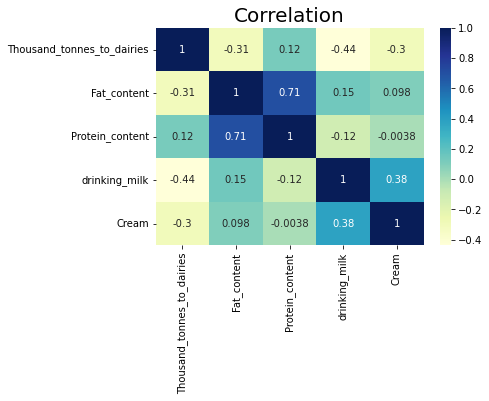

In [15]:
dataplot = sns.heatmap(dairy_production.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation', fontsize = 20)



# KNeighborsClassifier

In [16]:
#dairy_production_k = dairy_production[['TIME','Thousand tonnes to dairies','Fat content','Protein content','drinking_milk','Cream']]
dairy_production_k = dairy_production.reindex(columns=['Thousand_tonnes_to_dairies','Fat_content','Protein_content','drinking_milk','Cream','Country'])


In [17]:


from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

X = dairy_production_k.iloc[:,:4]
y = dairy_production_k.iloc[:,5]
# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 3)
# train the model
knn.fit(X_train, y_train)
# get the predict value from X_test
y_pred = knn.predict(X_test)
# print the score
print('accuracy: ', knn.score(X_test, y_test))
# accuracy:  0.973684210526

accuracy:  0.8120300751879699


In [18]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))   

In [19]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

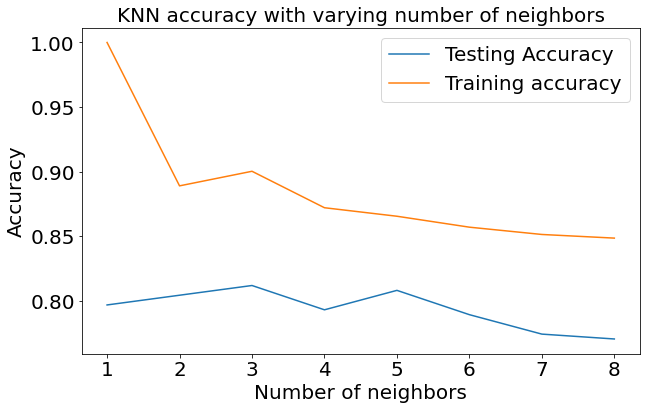

In [20]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

              precision    recall  f1-score   support

     Austria       0.65      0.69      0.67        54
     Belgium       0.85      0.80      0.83        51
     Denmark       0.91      0.98      0.94        59
     Ireland       0.89      0.83      0.86        48
      Sweden       0.77      0.74      0.75        54

    accuracy                           0.81       266
   macro avg       0.81      0.81      0.81       266
weighted avg       0.81      0.81      0.81       266



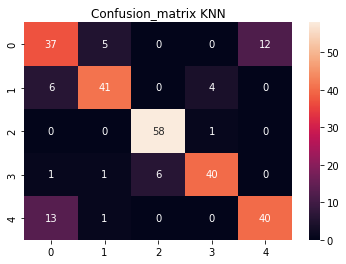

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.title("Confusion_matrix KNN")

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

# cross_val_score KNeighborsClassifier

In [48]:
# import k-folder
from sklearn.model_selection import cross_val_score # use the same model as before
knn = KNeighborsClassifier(n_neighbors = 3)
# X,y will automatically devided by 4 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X,y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333

[0.79699248 0.90977444 0.93984962 0.89097744 0.71428571]
0.8503759398496241


# GaussianNB

In [23]:
# Spliting the dataset into independent and dependent variables

X = np.asarray(dairy_production_k.drop('Country', 1))
y = np.asarray(dairy_production_k['Country'])


X,y

C:\Users\fenix\AppData\Local\Temp/ipykernel_15720/2092287471.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.asarray(dairy_production_k.drop('Country', 1))


(array([[260.02,   4.18,   3.34,  53.93,   5.5 ],
        [374.5 ,   4.4 ,   3.43,  45.2 ,   4.6 ],
        [122.4 ,   3.73,   3.09,  44.7 ,   0.7 ],
        ...,
        [365.74,   4.43,   3.43,  37.14,   1.35],
        [264.78,   4.3 ,   3.43,  60.72,   5.52],
        [222.41,   4.32,   3.54,  54.71,   5.18]]),
 array(['Belgium', 'Denmark', 'Ireland', ..., 'Ireland', 'Austria',
        'Sweden'], dtype=object))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1330, 5), (1330,), (1064, 5), (1064,), (266, 5), (266,))

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.5648373 , -0.55190908, -1.08383595,  0.4126621 , -0.31661133],
       [ 0.90554331,  0.91024483,  1.9461636 , -0.93839185, -0.58847899],
       [-0.47483091, -0.14855628, -0.18302527,  0.95123186, -0.18473523],
       ...,
       [-0.61270897,  0.15395832,  0.39021789,  0.43812456, -0.19690841],
       [ 0.93767024, -1.00568099,  0.7177854 , -0.73006257, -1.21742656],
       [ 0.25408062,  0.60773023,  0.30832601,  0.03612622,  2.83827081]])

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)
#print(y_pred)

In [28]:
y_compare = np.vstack((y_test, y_pred)).T
y_compare[:10, :]

array([['Denmark', 'Denmark'],
       ['Sweden', 'Austria'],
       ['Belgium', 'Belgium'],
       ['Belgium', 'Belgium'],
       ['Sweden', 'Sweden'],
       ['Sweden', 'Sweden'],
       ['Denmark', 'Denmark'],
       ['Belgium', 'Belgium'],
       ['Ireland', 'Ireland'],
       ['Belgium', 'Belgium']], dtype=object)

              precision    recall  f1-score   support

     Austria       0.86      0.91      0.89        47
     Belgium       0.98      0.92      0.95        49
     Denmark       1.00      1.00      1.00        57
     Ireland       1.00      1.00      1.00        55
      Sweden       0.86      0.86      0.86        58

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



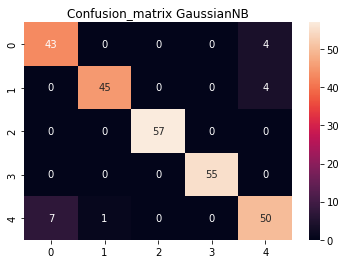

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.title("Confusion_matrix GaussianNB")
# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [30]:
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred += cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())) 

Correct predictions:  250
False predictions 16


Accuracy of the Naive Bayes Clasification is:  0.9398496240601504


# cross_val_score GaussianNB

In [47]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cross_val_score(gnb, X, y, scoring='accuracy', cv = 5).mean()

0.9097744360902256

# DATA SET TO STATISTICS

In [33]:
# It was created a special data set with data relevante para hypothesis test and was downloaded in order to do calculus on excel 

df = pd.DataFrame(milk_delivered_to_dairies)

In [34]:
df.to_csv(r'C:\Users\fenix\milk_delivered_to_dairies.csv', index=False)
